## Algoritmos Genéticos
> Técnica de Computação evolucionária que serve para busca de solução para problemas de otimização.

> Com inspiração em termos da biologia evolutiva, tais como a hereditaridade, seleção natural, cruzamento e mutação.

In [1]:
# Importação dos módulos
import random
import numpy

# Biblioteca
!pip install deap
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.4 MB/s eta 0:00:00


## Problema e Formulação
> Esses algoritmos procuram por soluções próximas do ótimo. Dessa forma, são comumente empregados em situações para os quais não existem algoritmos conhecidos que encontrem a solução ótima em tempo polinomial.

> Um bom exemplo para se aplicar o algoritmo genético é o do Caixeiro Viajante. A ideia básica desse problema consiste em encontrar a menor rota possível para visitar um conjunto de cidades, passando por cada uma delas uma única vez, e retornar à origem.
- O problema pode ser representado por um grafo conexo. Os vértices são as cidades e as arestas representam os caminhos entre as cidades.

In [5]:
# Gera a matriz de cidades
def graphTSP(numCities, minDist, maxDist):
  cities = numpy.zeros((numCities, numCities), dtype = int)
  for i in range(numCities):
    for j in range(numCities):
      if (j>i):
        cities[i, j] = random.randint(minDist, maxDist)
      elif (j<i):
        cities[i, j] = cities[j, i]
  return cities

numCities = 5     #  Número de cidade inicial

while(True):
  numCities = int(input('Digite o número de cidades: '))
  if (numCities > 4):
    break
  else:
    print('O número de cidades deve ser maior que 4!')

cities = graphTSP(numCities, 10, 100)
print('Grafo:\n', cities)

Digite o número de cidades: 15
Grafo:
 [[ 0 26 66 62 52 22 81 27 40 74 46 86 56 97 94]
 [26  0 76 92 75 78 64 13 78 64 83 36 41 48 55]
 [66 76  0 61 72 35 32 38 60 81 57 27 26 34 16]
 [62 92 61  0 37 75 80 95 60 11 16 27 98 96 48]
 [52 75 72 37  0 79 69 78 70 40 56 52 99 68 85]
 [22 78 35 75 79  0 74 74 36 75 70 13 90 47 42]
 [81 64 32 80 69 74  0 14 93 39 74 49 45 40 65]
 [27 13 38 95 78 74 14  0 76 10 38 44 36 18 67]
 [40 78 60 60 70 36 93 76  0 63 17 63 14 46 56]
 [74 64 81 11 40 75 39 10 63  0 98 45 53 50 76]
 [46 83 57 16 56 70 74 38 17 98  0 51 42 97 24]
 [86 36 27 27 52 13 49 44 63 45 51  0 67 30 35]
 [56 41 26 98 99 90 45 36 14 53 42 67  0 40 80]
 [97 48 34 96 68 47 40 18 46 50 97 30 40  0 37]
 [94 55 16 48 85 42 65 67 56 76 24 35 80 37  0]]


## Algoritmo Genético - População
>A população é o conjunto de indivíduos que estão sendo cogitados como solução e que serão usados para criar o novo conjunto de indivíduos para análise.

>O indivíduo, também chamado de cromossomo ou string, é uma possível solução para um dado problema. Cada indivíduo é um conjunto de parâmetros (genes), cuja representação depende do domínio do problema.
- Genótipo é a sequência de genes. No caso do problema do caixeiro, cada gene é uma cidade (número do vértice).
Exemplo: [0, 2, 1, 4, 3] é um genótipo de indivíduo para o problema do caixeiro com 5 cidades.
- Fenótico é o produto da interação de todos os genes.
Para o caixeiro seria a rota.

In [6]:
#Definição da Geração dos Indivíduos
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # minimizar = peso negativo
creator.create("Individual", list, fitness=creator.FitnessMin)
toolbox = base.Toolbox()

# Gerador de parâmetros
toolbox.register("attr_int", random.randint, 0, numCities-1)

# Define como os indivíduos/população é gerada
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, numCities)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

## Avaliação da Aptidão
> A Função de Aptidão ou Fitness mede o grau de aptidão de cada indivíduo da população.

> O grau de aptidão é a qualidade da solução (indivíduo) frente ao problema, ou seja, o quão próximo um indivíduo está da solução desejada ou quão boa é esta solução.

> Para o Problema do Caixeiro Viajante a aptidão está associada a menor rota. Assim, abaixo temos a função que mede o custo de uma rota (indivíduo).

In [7]:
def evalRoute(individual):
  cost = 0
  for i in range(1, len(individual)):
    if (individual.count(individual[i])>1):
      cost = cost + 1000000 # penalidade por repetir cidade
    cost = cost + cities[individual[i-1], individual[i]]
  cost = cost + cities[individual[i],individual[0]]
  return (cost,)

# Formato do Algortimo
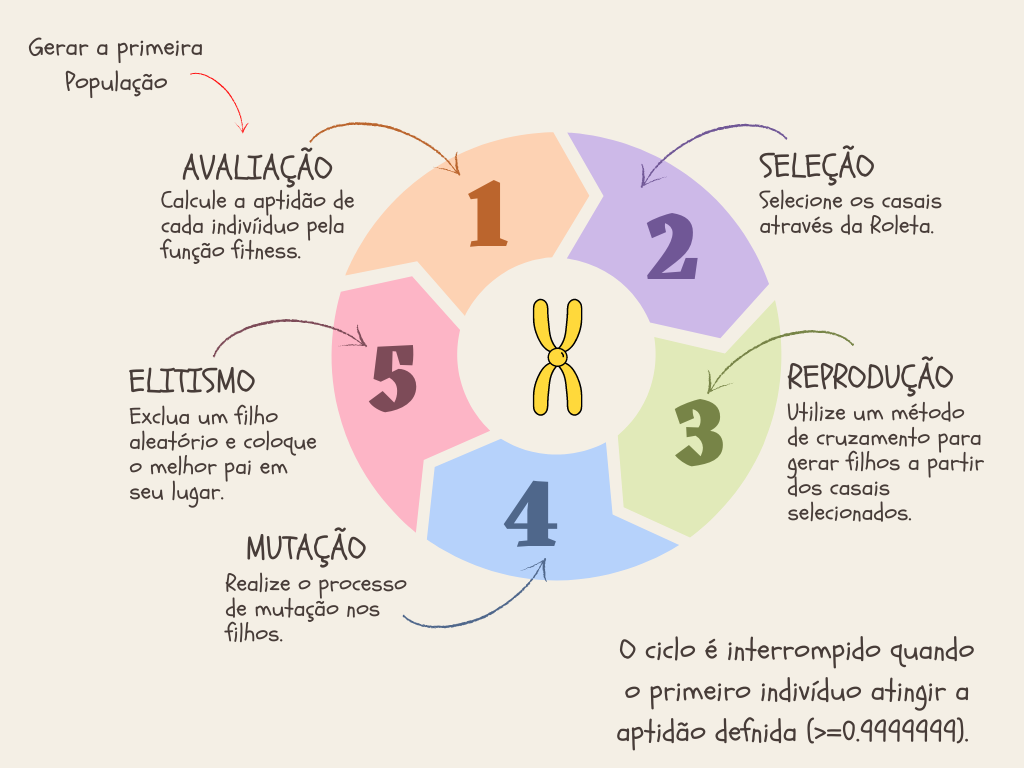
> Gerações
- A cada iteração do algoritmo, um novo conjunto de indivíduos é gerado a partir da população anterior.
- Cada novo conjunto é chamado de “Geração”.
- Através da criação de uma grande quantidade de gerações que é possível obter resultados dos Algoritmos Genéticos.

> Avaliação de Aptidão
- A função de aptidão é aplicada ao fenótipo do indivíduo.

> Seleção
- Selecionar os indivíduos sobre os quais serão aplicados os operadores genéticos.
- Escolhe preferencialmente, embora não exclusivamente, indivíduos com maior aptidão.
- Há diversas técnicas de seleção, entre elas há o método de seleção por Roleta e o método de seleção por Torneio.

> Cruzamento
- Também conhecida por Crossover ou Recombinação.
- Recombinação de características dos pais .
- Permite que as próximas gerações herdem essas características.
- Escolhe dois indivíduos e troca trechos dos cromossomos entre eles.

> Mutação
- Introdução e manutenção da diversidade genética.
- Altera aleatoriamente um ou mais genes no cromossomo

In [12]:
#Processamento do Algoritmo Genético

# Definindo avaliação de aptidão, seleção, cruzamento e mutação
toolbox.register("evaluate", evalRoute)
toolbox.register("select", tools.selTournament, tournsize=3) # seleção por torneio
toolbox.register("mate", tools.cxOnePoint) # um ponto de cruzamento
toolbox.register("mutate", tools.mutUniformInt, low=0, up=numCities-1, indpb=0.05)

def main():
  print('Execução do algoritmo genético:')

  random.seed(32)
  NGEN = 100     # número de gerações
  MU = 50        # tamanho da população
  LAMBDA = 100   # número de filhos gerados
  CXPB = 0.7     # probabilidade de cruzamento
  MUTPB = 0.3    # probabilidade de mutação

  pop = toolbox.population(n=MU)
  hof = tools.ParetoFront()
  stats = tools.Statistics(lambda ind: ind.fitness.values)
  stats.register("avg", numpy.mean, axis=0)
  stats.register("std", numpy.std, axis=0)
  stats.register("min", numpy.min, axis=0)
  stats.register("max", numpy.max, axis=0)

  algorithms.eaMuPlusLambda(pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats,
                            halloffame=hof)

  print('\nRota:', hof[0],'\nCusto:', evalRoute(hof[0])[0])
  return pop, stats, hof

if __name__ == "__main__":
    main()

Execução do algoritmo genético:
gen	nevals	avg         	std               	min       	max        
0  	50    	[8440777.38]	[1812825.67287948]	[4000797.]	[12000914.]
1  	100   	[6480766.78]	[1374615.12351441]	[4000636.]	[9000634.] 
2  	100   	[5360751.4] 	[974901.96323495] 	[4000636.]	[8000690.] 
3  	100   	[5180735.4] 	[1194829.10175419]	[2000810.]	[8000771.] 
4  	100   	[4480717.7] 	[1374601.70743669]	[2000765.]	[8000653.] 
5  	100   	[4000703.82]	[1385604.70749769]	[2000765.]	[8000792.] 
6  	100   	[3380718.36]	[1247187.04778223]	[2000765.]	[6000749.] 
7  	100   	[2740754.5] 	[996148.49507728] 	[2000765.]	[5000634.] 
8  	100   	[2340766.]  	[764438.67151554] 	[1000871.]	[5000733.] 
9  	100   	[2320761.94]	[988705.80048058] 	[1000871.]	[6000718.] 
10 	100   	[2000765.]  	[0.]              	[2000765.]	[2000765.] 
11 	100   	[1960762.72]	[280001.1030424]  	[755.]    	[2000765.] 
12 	100   	[1960758.88]	[280000.55468757] 	[755.]    	[2000765.] 
13 	100   	[1920753.68]	[391918.08994811] 	[